# Исследование успешности игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Цель** - Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных.**
 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre` — жанр игры
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score ` — оценка критиков (максимум 100)
 - `User_Score ` — оценка пользователей (максимум 10)
 - `Rating ` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Открываю файл с данными и изучаю общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


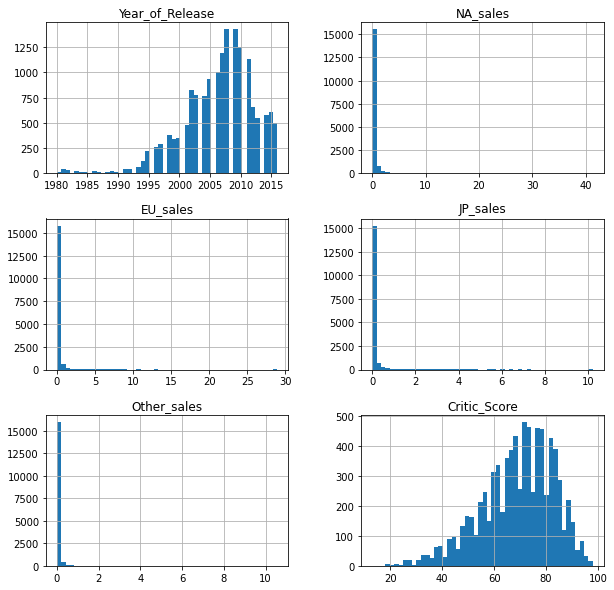

In [4]:
data.hist(figsize=(10, 10), bins = 50)
None

Большая часть игр была выпущена с 2004 по 2011 год. Большая часть игр продалась до 1млн копий. Оценки критиков выше 65% по большей части.

Дана сет состоит из 11 колонок и 16715 строк. Названия колонок:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Предобработка данных

### Привожу к нижнему регистру названия столбцов

In [5]:
data= data.rename(columns=str.lower)

### Преобразовываю столбцы в другие форматы данных и обрабатываю пропуски

In [6]:
#data['Year_of_Release'] = pd.to_datetime(data['Year_of_Release'],format = '%Y') 

tbd  - to be detemined. Чтобы гарантировать, что METASCORES точно отражает обзоры, данные критиками для любого конкретного фильма, игры, телешоу или альбома, мы не отображаем METASCORE для тех элементов, которые не имеют по крайней мере четырех (4) обзоров в нашей базе данных. Как только будет достигнуто это минимальное количество отзывов, отобразится METASCORE.
Поэтому заменяю на **0** пропуски и tbd. В дальнейшем может получится связать как-то с количеством продаж и выставить рейтинг относительно этого

In [7]:
data.loc[data['user_score'] == 'tbd',['user_score']] = 0

In [8]:
data.loc[data['user_score'].isna(),['user_score']] = 0

In [9]:
data.loc[data['rating'].isna(),['rating']] = 'No_Rating'

In [10]:
data.loc[data['critic_score'].isna(),['critic_score']] = 0

In [11]:
data['user_score'] = data['user_score'].astype('float')

In [12]:
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [13]:
#Код ревьюера
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [14]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,0.0,0.0,No_Rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,0.0,0.0,No_Rating
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,0.0,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.0,0.0,No_Rating


В названии игры может присутствовать год выпуска

In [15]:
for i in data.loc[data['year_of_release'].isna()].sort_values(by = 'name')['name'].unique():
    if '20' in str(i) or '19' in str(i) or '21' in str(i):
        print(i)

All-Star Baseball 2005
FIFA Soccer 2004
Football Manager 2007
Jet X20
MLB SlugFest 20-03
Madden NFL 2002
Madden NFL 2004
NASCAR Thunder 2003
NBA Live 2003
NFL GameDay 2003
PDC World Championship Darts 2008
PES 2009: Pro Evolution Soccer
Sega Rally 2006
Tomb Raider (2013)
Tour de France 2011
wwe Smackdown vs. Raw 2006


In [16]:
data.loc[data['name'] == 'All-Star Baseball 2005',['year_of_release']] = 2005
data.loc[data['name'] == 'FIFA Soccer 2004',['year_of_release']] = 2004
data.loc[data['name'] == 'Football Manager 2007',['year_of_release']] = 2007
data.loc[data['name'] == 'Madden NFL 2002',['year_of_release']] = 2002
data.loc[data['name'] == 'Madden NFL 2004',['year_of_release']] = 2004
data.loc[data['name'] == 'NASCAR Thunder 2003',['year_of_release']] = 2003
data.loc[data['name'] == 'PDC World Championship Darts 2008',['year_of_release']] = 2008
data.loc[data['name'] == 'PES 2009: Pro Evolution Soccer',['year_of_release']] = 2009
data.loc[data['name'] == 'Sega Rally 2006',['year_of_release']] = 2006
data.loc[data['name'] == 'Tomb Raider (2013)',['year_of_release']] = 2013
data.loc[data['name'] == 'Tour de France 2011',['year_of_release']] = 2011
data.loc[data['name'] == 'wwe Smackdown vs. Raw 2006',['year_of_release']] = 2006
data.loc[data['name'] == 'NBA Live 2003',['year_of_release']] = 2003
data.loc[data['name'] == 'NFL GameDay 2003',['year_of_release']] = 2003

In [17]:
data['name'] = data['name'].fillna(value = 'No_name')

In [18]:
data.isna().sum()

name                 0
platform             0
year_of_release    252
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [19]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No_Rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No_Rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No_Rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No_Rating


Добавим стольбец с суммарными продажами

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Избавлюсь от игр, у ктр неизвестен год выпуска

In [21]:
data = data.dropna(subset=['year_of_release'])

Полные дупликаты отсутсвуют

In [22]:
data.duplicated().sum()

0

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No_Rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No_Rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No_Rating,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No_Rating,0.01


В результате предобработки данных было сделано следущее:
- заменены пропуски и tdb в столбцах **Critic_Score**, **User_Score** на 0 с возможностью дальнейшей обработки
- отбросил строки с пропусками в **Year_of_Release**
- изменен формат данных в столбце **Critic_Score**, **User_Score** на float

## Исследовательский анализ данных

### Анализ количества выпущенных игр по годам

In [24]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

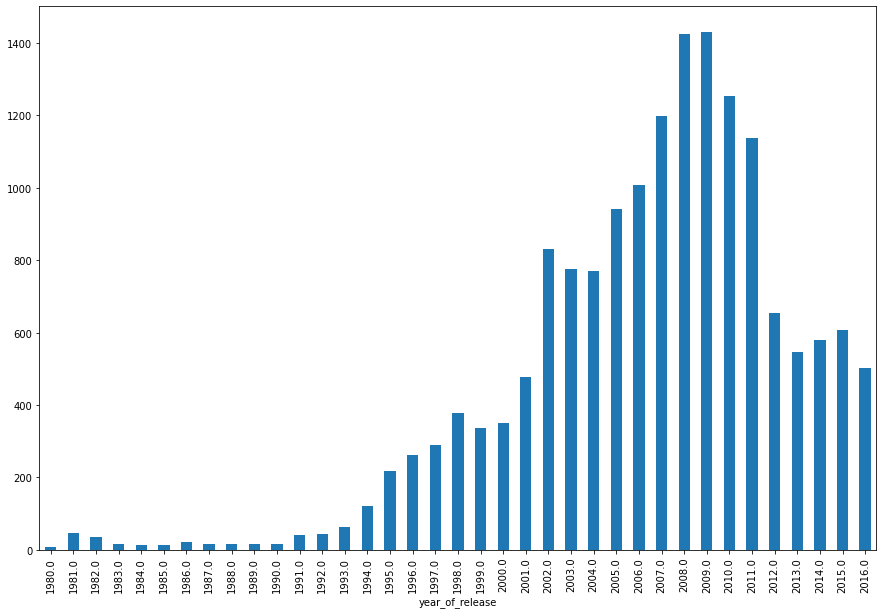

In [25]:
data.value_counts('year_of_release', sort=False).plot(kind = 'bar', figsize=(15, 10))
None

Основной выпуск игр приходится на года с 2002 по текущий год. Хотя с 2012 резко упало количество, но там данные будут наиболее уданые для оценки успешности успешности, т.к. наиболее свежие.

### Анализ количества игр по платформам

In [26]:
data.groupby(['platform'])['year_of_release'].count().sort_values()

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        97
NES       98
2600     116
WiiU     147
SAT      173
SNES     239
XOne     247
N64      316
PS4      392
PSV      429
3DS      512
GC       543
XB       806
GBA      811
PC       958
PS      1190
PSP     1195
X360    1234
Wii     1286
PS3     1306
DS      2122
PS2     2134
Name: year_of_release, dtype: int64

<AxesSubplot:xlabel='platform'>

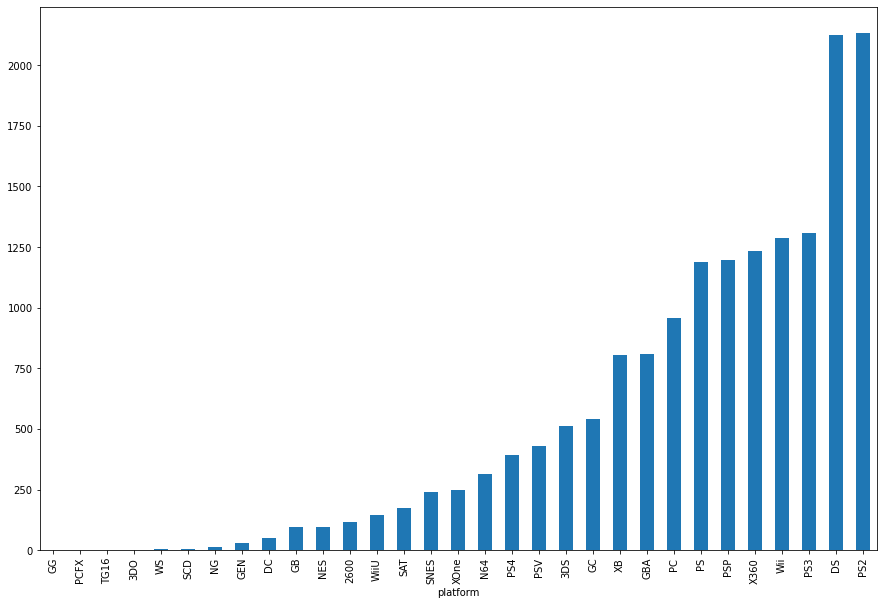

In [27]:
data.groupby(['platform'])['year_of_release'].count().sort_values().plot(kind = 'bar', figsize=(15, 10))

### Найдем средний жизненный цикл платформы

In [28]:
data_year = data.groupby('platform').agg({'year_of_release' : ['min','max']}).reset_index()
data_year['platform_life'] = data_year['year_of_release','max'] - data_year['year_of_release','min']
data_year

platform year_of_release         platform_life
                        min     max              
0      2600          1980.0  1989.0           9.0
1       3DO          1994.0  1995.0           1.0
2       3DS          2011.0  2016.0           5.0
3        DC          1998.0  2008.0          10.0
4        DS          1985.0  2013.0          28.0
5        GB          1988.0  2001.0          13.0
6       GBA          2000.0  2007.0           7.0
7        GC          2001.0  2007.0           6.0
8       GEN          1990.0  1994.0           4.0
9        GG          1992.0  1992.0           0.0
10      N64          1996.0  2002.0           6.0
11      NES          1983.0  1994.0          11.0
12       NG          1993.0  1996.0           3.0
13       PC          1985.0  2016.0          31.0
14     PCFX          1996.0  1996.0           0.0
15       PS          1994.0  2003.0           9.0
16      PS2          2000.0  2011.0          11.0
17      PS3          2006.0  2016.0          10.0
18      PS4          2013.0  2016.0           3.0
19      PSP          2004.0  2015.0          11.0
20      PSV          2011.0  2016.0           5.0
21      SAT          1994.0  1999.0           5.0
22      SCD          1993.0  1994.0           1.0
23     SNES          1990.0  1999.0           9.0
24     TG16          1995.0  1995.0           0.0
25       WS          1999.0  2001.0           2.0
26      Wii          2006.0  2016.0          10.0
27     WiiU          2012.0  2016.0           4.0
28     X360          2005.0  2016.0          11.0
29       XB          2000.0  2008.0           8.0
30     XOne          2013.0  2016.0           3.0

In [29]:
platform_mean_life = data_year['platform_life'].mean()/2
platform_mean_life

3.806451612903226

Жизненный цикл платформы 7.612903225806452. Я поделил его пополам, чтобы не брать в расчет спад популярности платформы и попасть точно в пик популярности. Так как, строим прогноз на 2017 год при жизненном цикле таком-то, то актуальный период берем [2017 - 7.612903225806452;2017]

In [30]:
np.ceil(2017 - platform_mean_life)

2014.0

Создаю конечный ДФ для работы

In [31]:
data_2 = data.loc[data['year_of_release'] > (2017-platform_mean_life)].reset_index(drop = True)

In [32]:
data_2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,No_Rating,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,No_Rating,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,No_Rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1682,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01
1683,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01
1684,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01
1685,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No_Rating,0.01


Итого в нашем распоряжении для анализа 1687 игр с 2014 по 2016 год

### Проанализируем изменения продаж по платформам за актуальный период

In [33]:
data_grouped_number_games = data_2.groupby(['year_of_release','platform']).agg(количество=('year_of_release','count')).reset_index()
data_grouped_number_games

,year_of_release,platform,количество
0,2014.0,3DS,80
1,2014.0,PC,47
2,2014.0,PS3,108
3,2014.0,PS4,74
4,2014.0,PSP,10
5,2014.0,PSV,100
6,2014.0,Wii,6
7,2014.0,WiiU,31
8,2014.0,X360,63
9,2014.0,XOne,60


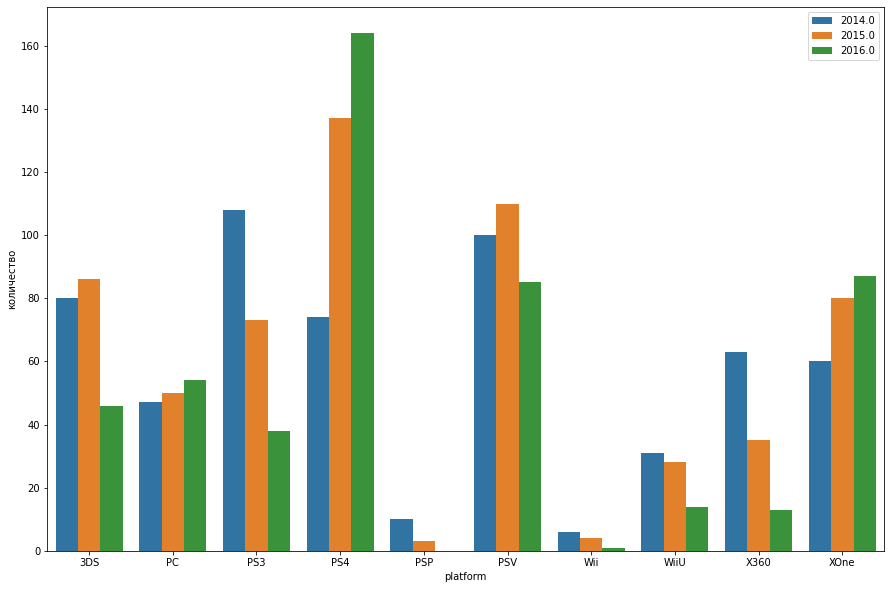

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x='platform',y='количество', data = data_grouped_number_games, hue = 'year_of_release')
plt.legend(loc='upper right')
None

У всех платформ количество игр падают кроме PC, PS4, Xbox One. Наибольшее количество игр и наибольший прирост имеет платформа PS4

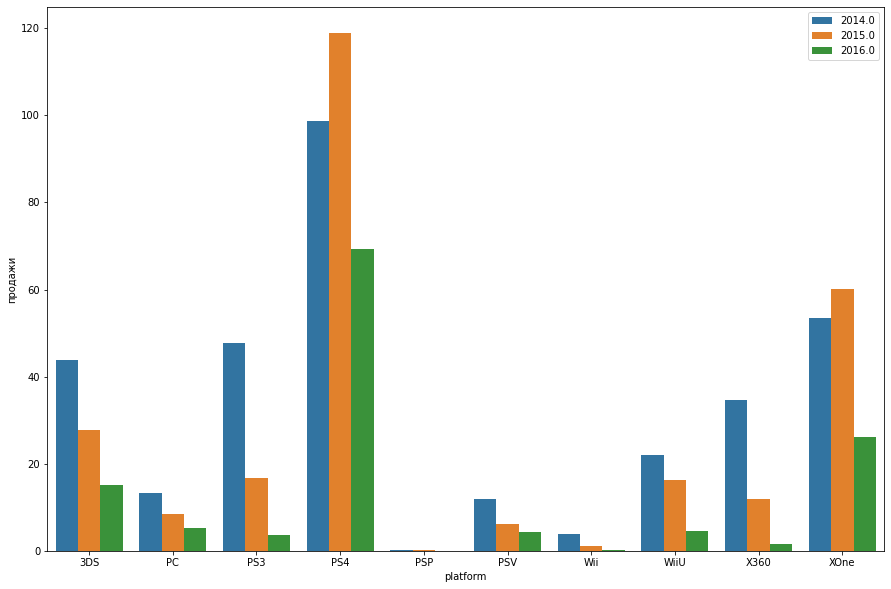

In [35]:
data_grouped_total_sales = data_2.groupby(['year_of_release','platform']).agg(продажи=('total_sales','sum')).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='platform',y='продажи', data = data_grouped_total_sales, hue = 'year_of_release')
plt.legend(loc='upper right')
None

У всех платформ общие продажи в упадке за 2016 год, но данные не полные и в полне может быть, что при полных данных будет большее количество чем в 2015. Наиболее успешная платформа в перспективе PS4, т.к. она имеет нибольший прирост за данный промежуток времени. Хорошие показатели еще у Xone,PC.

### Построю ящик с усами в разбивке по платформам

(0.0, 2.0)

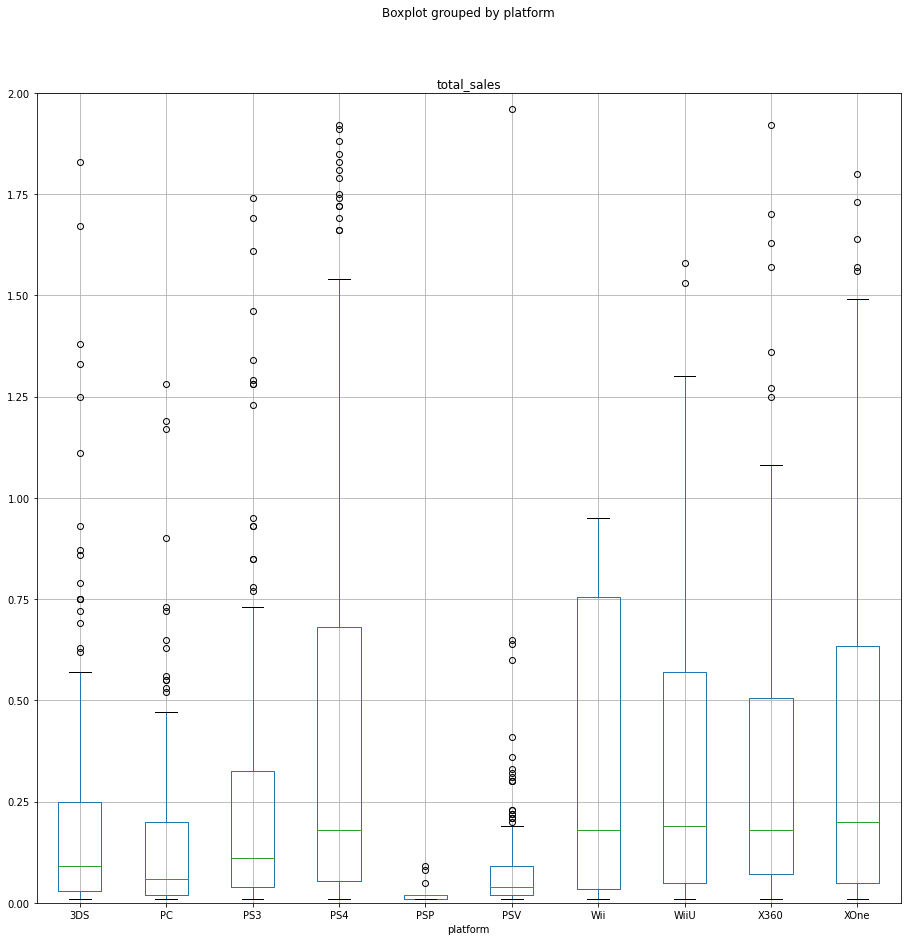

In [36]:
data_2.boxplot(column= 'total_sales', by = 'platform', figsize = (15,15))
plt.ylim(0,2)

Большое количество выбросов говорит, о очень большом количестве продуктов с очень маленькими продажами. Исходя из этого графика делаем вывод, что самые удачные платформы это Wii, PS4, X360, XOne, WiiU

### Построю диаграмму рассеивания по отзывам и продажам по платформам и проанализирую корреляции

В результате предыдущих исследований останавливаемся на платформах PC, PS4, Xone.

Чтобы нули в столбцах **critic_score** и **user_score** не вносили искажения в исследования корреляций, создам новый ДФ без данных строк.

In [37]:
data_2_no_zero = data_2.loc[(data_2['critic_score'] != 0) & (data_2['user_score'] != 0)]

**Для PC**

,critic_score,user_score,total_sales
critic_score,1.000000,0.466099,0.172061
user_score,0.466099,1.000000,-0.089974
total_sales,0.172061,-0.089974,1.000000


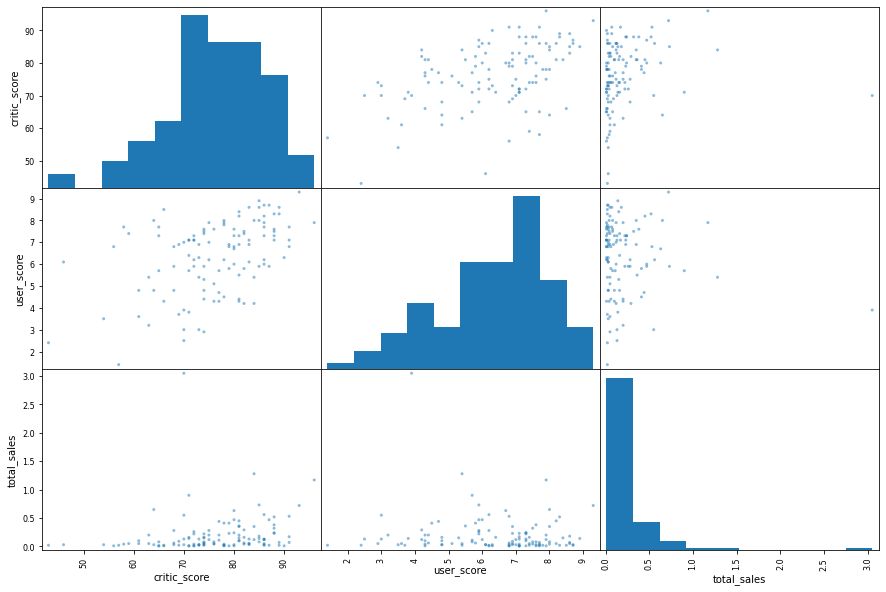

In [38]:
correlation_list = list(['critic_score','user_score','total_sales'])
pd.plotting.scatter_matrix(data_2_no_zero.loc[data_2_no_zero['platform'] == 'PC'][correlation_list], figsize=(15, 10))
None
data_2_no_zero.loc[data_2_no_zero['platform'] == 'PC'][correlation_list].corr()

**Для PS4**

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.401903
user_score,0.546434,1.000000,-0.043186
total_sales,0.401903,-0.043186,1.000000


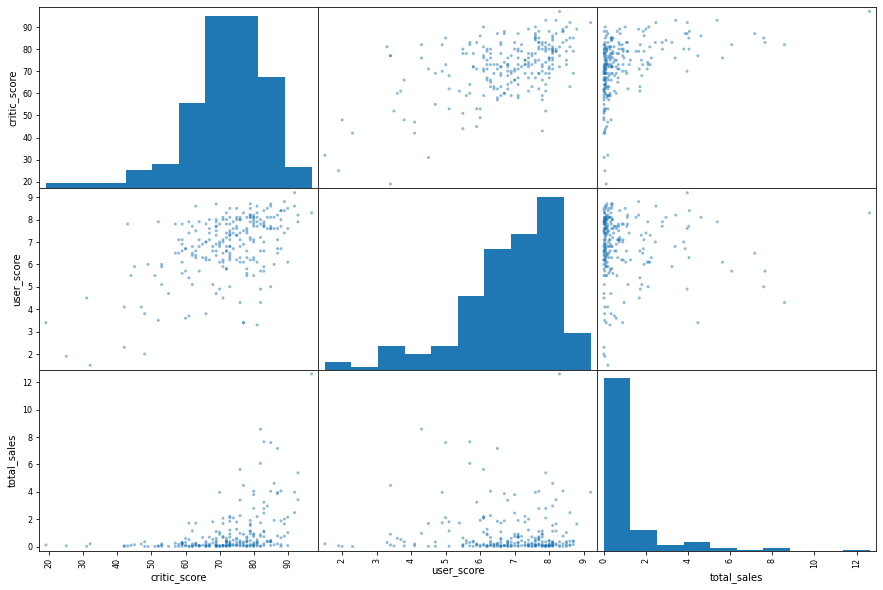

In [39]:
pd.plotting.scatter_matrix(data_2_no_zero.loc[data_2_no_zero['platform'] == 'PS4'][correlation_list], figsize=(15, 10))
None
data_2_no_zero.loc[data_2_no_zero['platform'] == 'PS4'][correlation_list].corr()

**Для XOne**

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.422112
user_score,0.440977,1.000000,-0.091734
total_sales,0.422112,-0.091734,1.000000


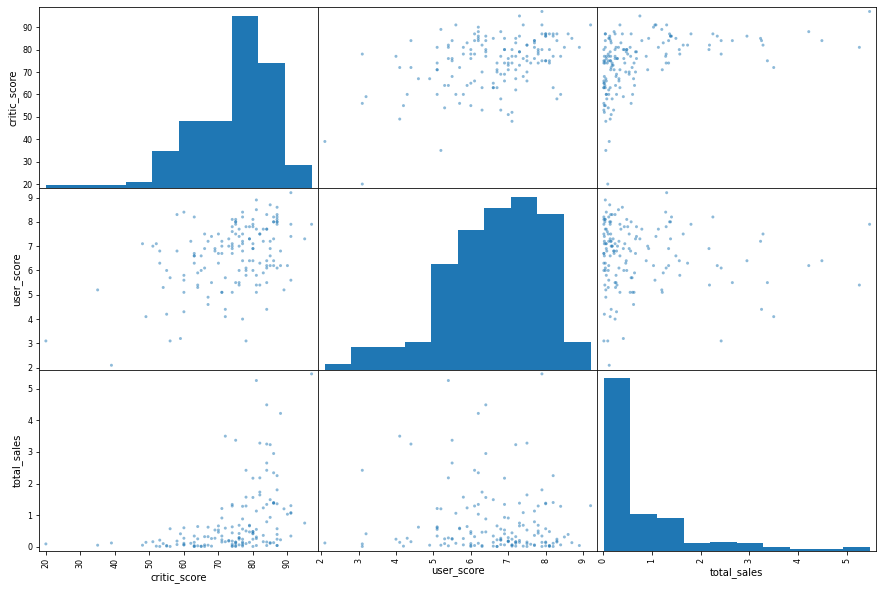

In [40]:
pd.plotting.scatter_matrix(data_2_no_zero.loc[data_2_no_zero['platform'] == 'XOne'][correlation_list], figsize=(15, 10))
None
data_2_no_zero.loc[data_2_no_zero['platform'] == 'XOne'][correlation_list].corr()

In [41]:
data_2_no_zero.loc[data_2_no_zero['platform'] == 'PC'][correlation_list].corr().iloc[2]

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64

In [42]:
data_2_no_zero.loc[data_2_no_zero['platform'] == 'PS4'][correlation_list].corr().iloc[2]

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64

In [43]:
data_2_no_zero.loc[data_2_no_zero['platform'] == 'XOne'][correlation_list].corr().iloc[2]

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64

Итого: корреляция между общими продажами и отзывами пользователей отсутствует. Корреляция между оценками критиков на ПС и продажами очень слабая, на PS4 и XOne средняя. Следовательно, на платформах PS4,XOne чем выше оценки критиков, тем выше продажи.

### Нахожу популярный жанр

In [44]:
data_2.groupby('genre').agg(продажи_средние=('total_sales','mean'), продажи_медианные=('total_sales','median')) \
    .sort_values(by = 'продажи_средние', ascending = False) \
    .style.background_gradient(subset=('продажи_средние')). background_gradient(subset=('продажи_медианные'))

,продажи_средние,продажи_медианные
genre,,
Shooter,1.335469,0.515000
Sports,0.680000,0.180000
Platform,0.476053,0.140000
Fighting,0.470333,0.125000
Role-Playing,0.459005,0.110000
Racing,0.398841,0.090000
Misc,0.332301,0.090000
Action,0.319854,0.090000
Simulation,0.298409,0.100000


Можно сделать вывод, что наилучшие продажи показывает жанр Shooter, затем Sports, затем Platform.
Самые плохие результаты показывают Adventure, Puzzle, Strategy.

## Нахожу портрет каждого региона

### Регион NA

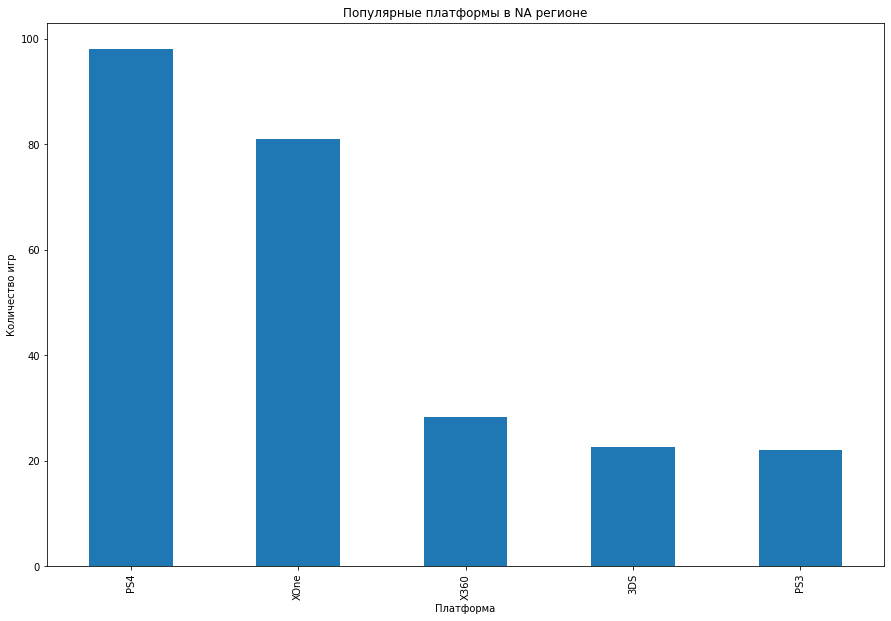

In [45]:
data_2.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные платформы в NA регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

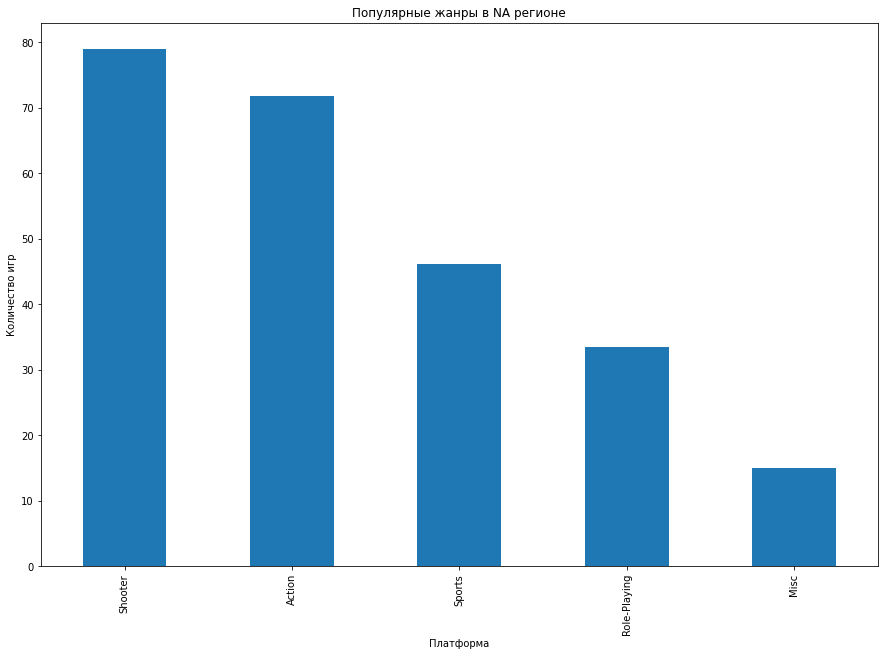

In [46]:
data_2.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные жанры в NA регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

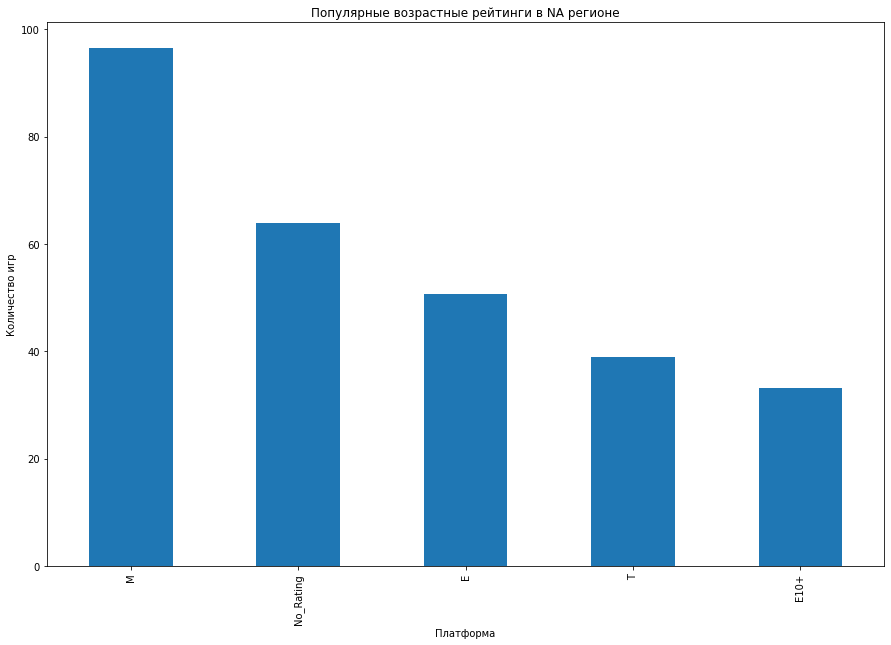

In [47]:
data_2.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные возрастные рейтинги в NA регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

Для региона Северная Америка наибольшие продажи имеют:
- платформы PS4, XOne, X360, 3DS, PS3
- жанры Shooter, Action, Sports, Role-Playing, Misc
- рейтинг M, No_rating, E, T, E10

### Регион EU

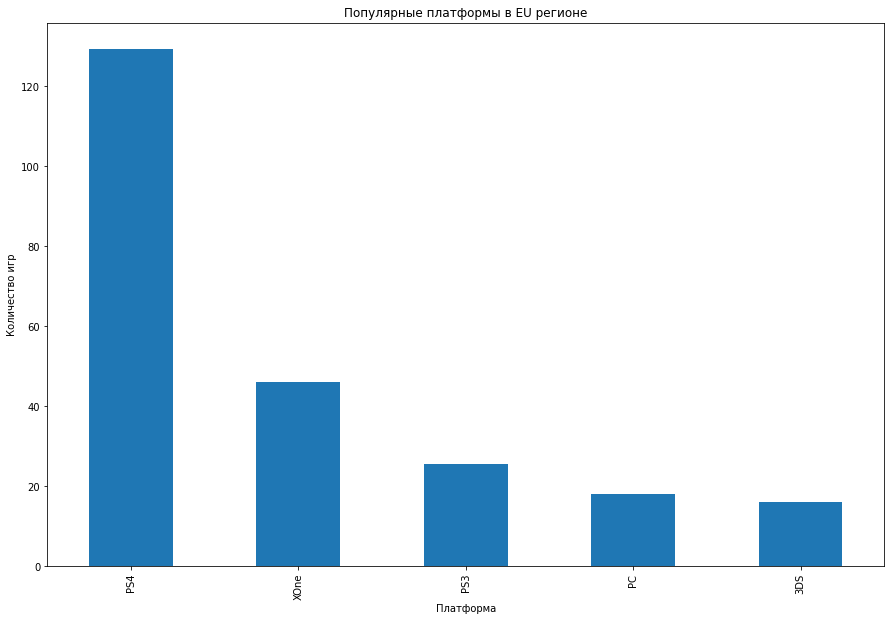

In [48]:
data_2.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные платформы в EU регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

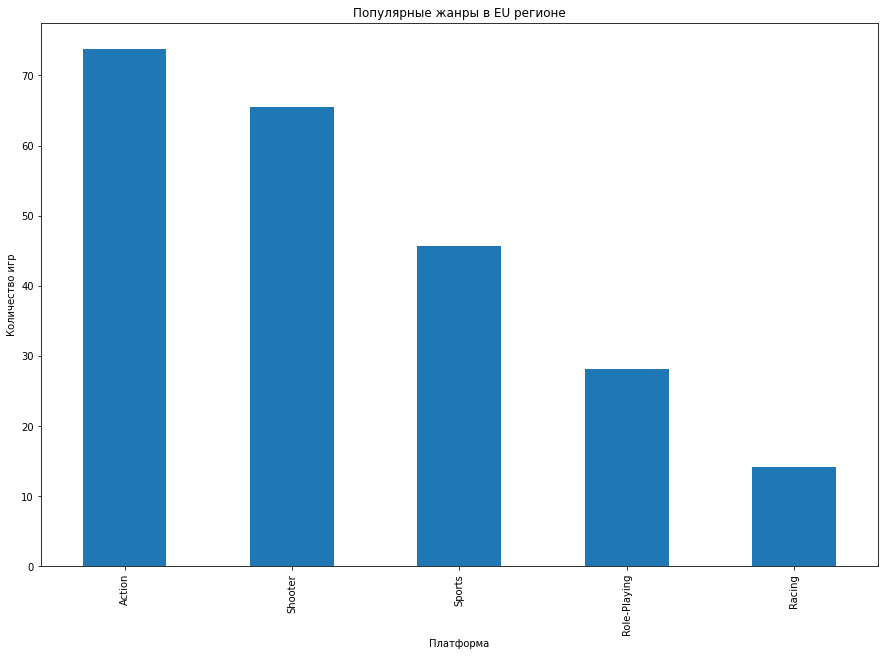

In [49]:
data_2.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные жанры в EU регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

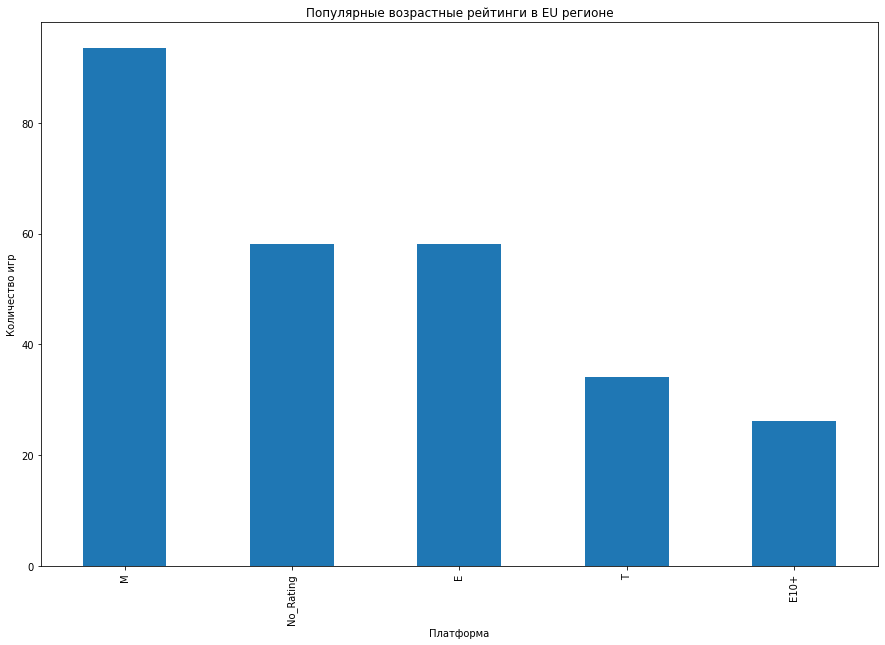

In [50]:
data_2.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные возрастные рейтинги в EU регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

Для региона Европа наибольшие продажи имеют:
- плтформы PS4, XOne, PS3, PC, 3DS
- жанры Action, Shooter, Sports, Role-Playing, Racing
- рейтинг M, No_rating, E, T, E10

### Регион JP

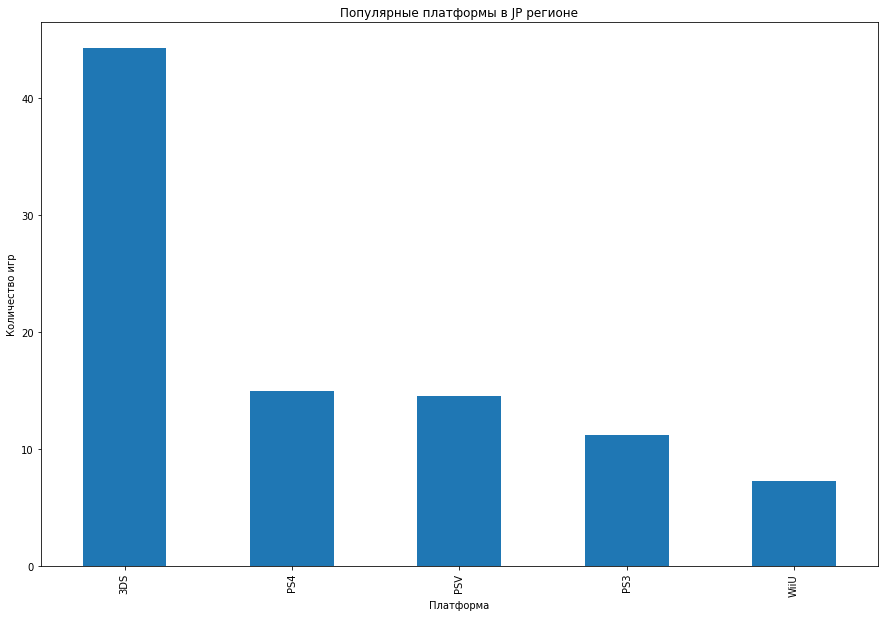

In [51]:
data_2.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные платформы в JP регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

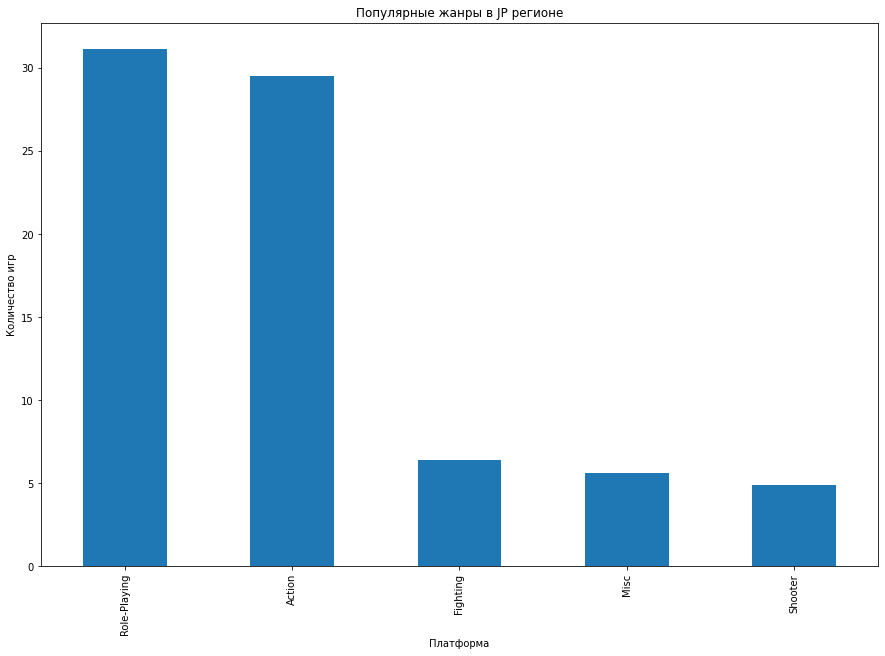

In [52]:
data_2.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные жанры в JP регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

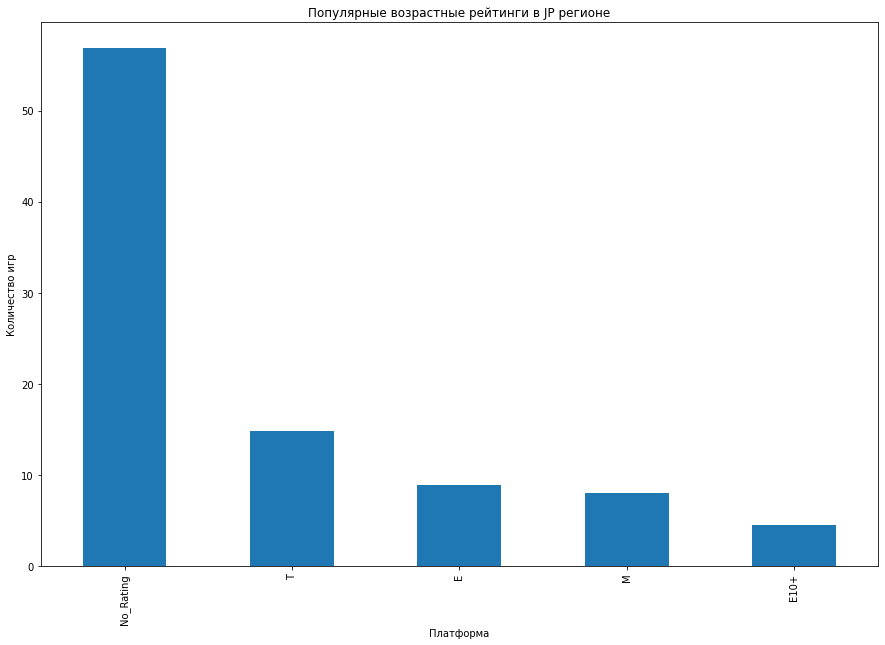

In [53]:
data_2.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5) \
    .plot(kind = 'bar', title = 'Популярные возрастные рейтинги в JP регионе', xlabel = 'Платформа', ylabel = 'Количество игр', figsize = (15,10))
None

Для региона Япония наибольшие продажи имеют:
- платформы 3DS, PS4, PSV, PS3, WiiU
- жанры Role-Playing, Action, Fighting, Misc, Shooter
- рейтинг No-Rating, E, T, M, E10+

Наличие такого количества No_Rating объясняет тем, что огромное количество игр создается только для внутренней аудитории, соответвенно иностранные агенства их не оценивают.

## Проверка гипотез

Альфа взял 0.05, т.к. такое значение наиболее популярное. Тест провожу о равенстве средних двух генеральных совокупностей. Т.к. надо сравнить средние двух генеральных совокупностей)

```
H_0: Средние пользовательские рейтинги (User_Score) платформ Xbox One и PC одинаковые;
Н_1: Средние пользовательские рейтинги (User_Score) платформ Xbox One и PC не одинаковые;
```

In [54]:
results = st.ttest_ind(
    data_2_no_zero.loc[(data_2_no_zero['platform'] =='PC')]['user_score'], 
    data_2_no_zero.loc[(data_2_no_zero['platform'] =='XOne')]['user_score'], equal_var = False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.1403785186826978
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть гипотезу H_0: Средние пользовательские рейтинги (User_Score) платформ Xbox One и PC одинаковые, следовательна она верна.

```
H_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
Н_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не одинаковые;
```

In [55]:
results = st.ttest_ind(
    data_2_no_zero.loc[(data_2_no_zero['genre'] =='Action')]['user_score'], 
    data_2_no_zero.loc[(data_2_no_zero['genre'] =='Sports')]['user_score'], equal_var = False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

8.327612976032047e-09
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, значит верна гипотеза альтернативная Н_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не одинаковые

# Вывод

- Основной выпуск игр приходится на года с 2002 по текущий год. Хотя с 2012 резко упало количество, но там данные будут наиболее уданые для оценки успешности успешности, т.к. наиболее свежие.;
- Основные платформы PC, PS4, Xbox One;
- Самые высокие продажи у PS4 в размере 80млн копий, что превышает вторую по продаваемости консоль XOne в два раза и PC в десятки раз;
- Самые высокие оценки на PC;
- На платформах PS4,XOne чем выше оценки критиков, тем выше продажи.
- Самые кассовые жанры Shooter с средней продажей 1.34 млн копий, затем Sports, Platform. Самые не продаваемые это Adventure, Puzzle, Strategy;
- Самый популярный жанр Action в мире, большую долю вносят регионы EU и NA;
- Рейтинг самый продаваемый M;
- Оценки пользователей у PC и Xbox One не отличаются;
- Оценки пользователей у Action и Sports отличаются.

**Итого:**
Чтобы выбрать потенциально популярный продукт и спланировать рекламную кампанию, необходимо обратить внимание на:
- жанр Shooter;
- платформу PS4 или, в зависимости от разработчика, можно посмотреть в сторону PC или Xbox One, т.к. большинство продуктов становятся мультиплатформенными в конечном итоге.